In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Reading the application data first and looking at the shape and head of the dataframe**

In [3]:
App_df = pd.read_csv('application_data.csv')
App_df.shape

(307511, 122)

In [4]:
App_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
App_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [6]:
pd.set_option('display.max_rows', None)
App_df.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [8]:
perc = 35.0000
Threshold_value = int(((100-perc)/100)*App_df.shape[0]+1)
App_df = App_df.dropna(axis = 1, thresh = Threshold_value)
App_df.shape

(307511, 73)

In [9]:
App_df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

**#since the "occupation Type" is an important variable in the analysys i am going to replace the null value with others**

In [10]:
App_df.OCCUPATION_TYPE.fillna(value = 'Others', inplace=True)
App_df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [11]:
App_df.AMT_ANNUITY.fillna(value = np.NaN, inplace=True)
App_df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

**I found that 'CNT_FAM_MEMBERS' could also play as an important variable for analysys i will replace the null values with the mean value of the column**

In [12]:
mean_value = App_df['CNT_FAM_MEMBERS'].mean()
App_df.CNT_FAM_MEMBERS.fillna(value = mean_value, inplace = True)
App_df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [13]:
App_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

**#After this step i am going to do univariate, bivariate and segmented univariate analysis for some of the selected important variables**

In [14]:
#I have created a extra column of clients age in years.
App_df['Years_Birth'] = App_df.DAYS_BIRTH.apply(lambda x: (-x//365))
App_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0   
1  ...                 0                0                0   
2  ...                 0                0                0   
3  ...                 0                0                0   
4  ...                 0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  Years_Birth  
0                        0.0                         1.0           25  
1                        0.0                         0.0           45  
2                        0.0                         0.0           52  
3                        NaN                         NaN           52  
4                        0.0                         0.0           54  

[5 rows x 74 columns]

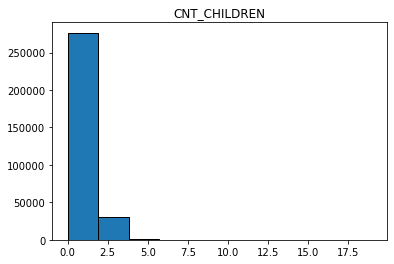

In [34]:
App_df.hist(column='CNT_CHILDREN', grid = False, edgecolor='black')
plt.show()

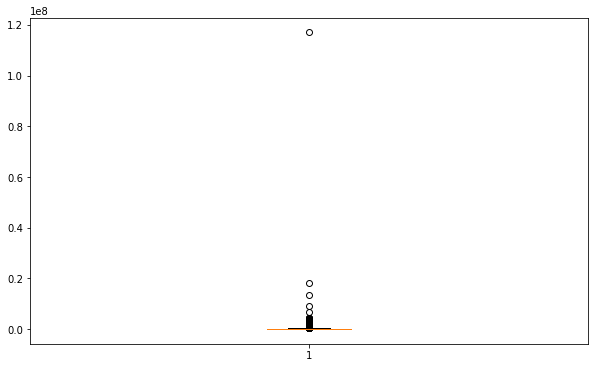

In [158]:
plt.figure(figsize=(10,6))
plt.boxplot(App_df['AMT_INCOME_TOTAL'])
plt.show()

**By doing Univariate analysis for the coloumn of clients income most of the clients who has applied for loan has income under 2 crores and there is an outlier whoose income is reportedly to be around 12 crores.**

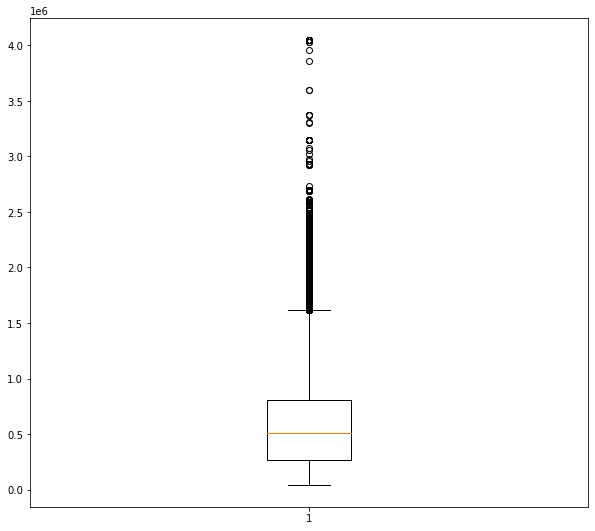

In [30]:
plt.figure(figsize=(10,9))
plt.boxplot(App_df['AMT_CREDIT'])
plt.show()

By doing univariate analysis for the loan amount credited to the client by bank, i have found that average amount given by the bank is around 5 lakhs and upto 40 lakhs

By plotting histogram for the number of children to the clients who had applied for loan, most of the clients has no kids to 2 kids.

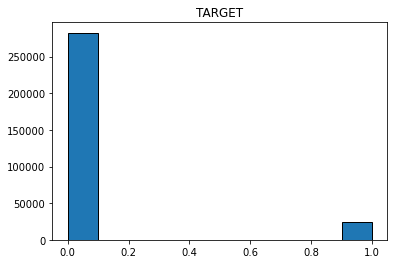

In [36]:
App_df.hist(column='TARGET', grid = False, edgecolor='black')
plt.show()

A univariate analysis for a target variable shows that most of the clients does not have payment difficulties whereas around 15 to 20 thousand clients has difficulty in payment. Hence we could say that there is no data imbalance

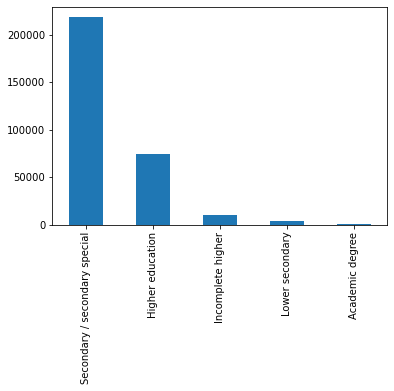

In [40]:
App_df.NAME_EDUCATION_TYPE.value_counts().plot(kind = 'bar')
plt.show()

By plotting a bar plot for education type of the clients most of them belong to secondary or secondary special category and very less people belong to academic degree

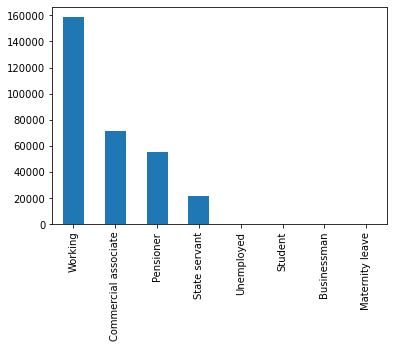

In [41]:
App_df.NAME_INCOME_TYPE.value_counts().plot(kind = 'bar')
plt.show()

by plotting a bar plot most of the clients who has applied for loans are working, commercial associate, pensioner and state servant

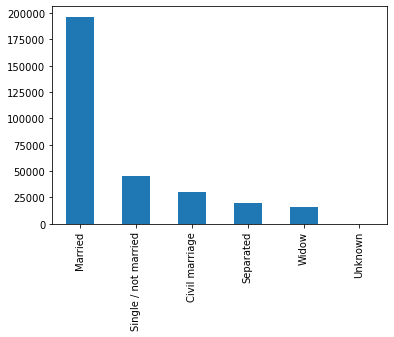

In [42]:
App_df.NAME_FAMILY_STATUS.value_counts().plot(kind = 'bar')
plt.show()

by plotting the bar plot for family status of the client, we can see that most of the people are married, who has applied for loan.

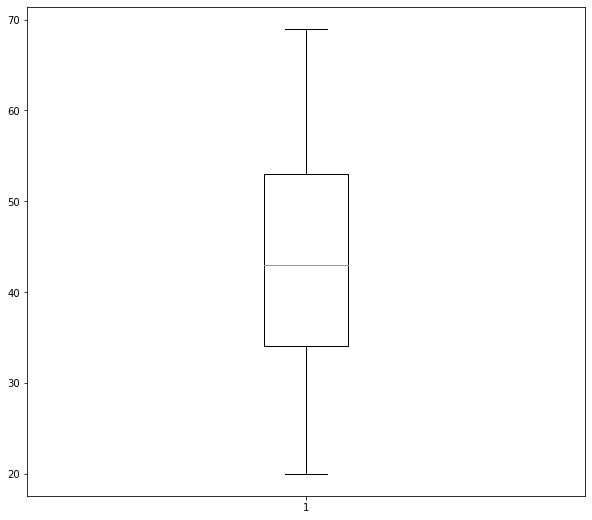

In [43]:
plt.figure(figsize=(10,9))
plt.boxplot(App_df['Years_Birth'])
plt.show()

by plotting the box plot for the age of the clients we can see that the average age lies between 40 to 50 years, max age of the person is nearly equal to 70 and the lowest age is around 25.

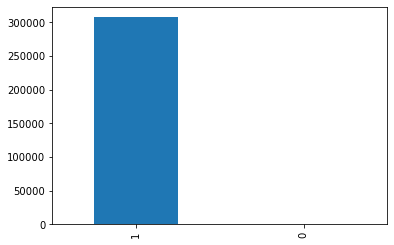

In [44]:
App_df.FLAG_MOBIL.value_counts().plot(kind = 'bar')
plt.show()

by plotting the graph we can see almost evryone has provided the mobile number, we can also identify this by looking at the null values, there is no null values in the column

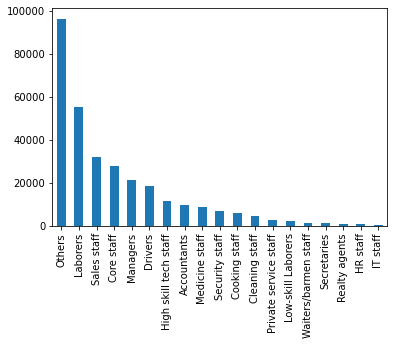

In [45]:
App_df.OCCUPATION_TYPE.value_counts().plot(kind = 'bar')
plt.show()

we can see that most of the people who had not provided thier occupation has more number of people and we had renamed it as others, apart from them most of the people are labourers and least members are from IT staff

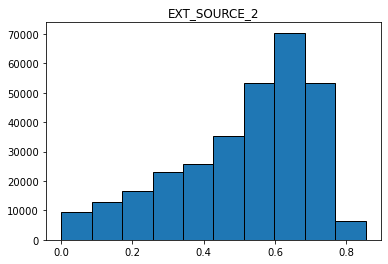

In [49]:
App_df.hist(column='EXT_SOURCE_2', grid = False, edgecolor='black')
plt.show()

The normalised score from external source 2 has more score between 0.6 to 0.8

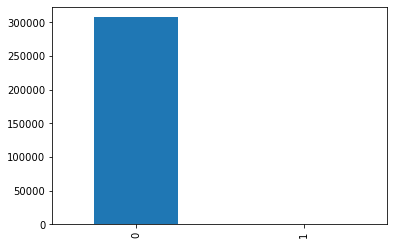

In [52]:
App_df.FLAG_DOCUMENT_2.value_counts().plot(kind = 'bar')
plt.show()

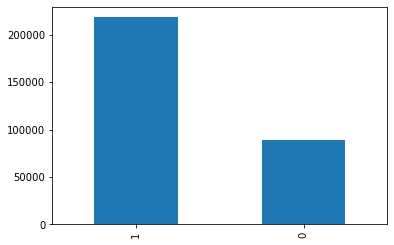

In [55]:
App_df.FLAG_DOCUMENT_3.value_counts().plot(kind = 'bar')
plt.show()

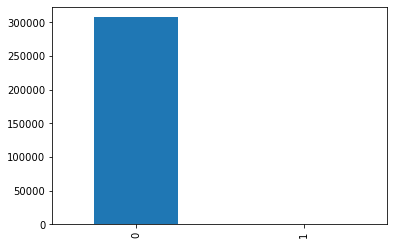

In [58]:
App_df.FLAG_DOCUMENT_4.value_counts().plot(kind = 'bar')
plt.show()

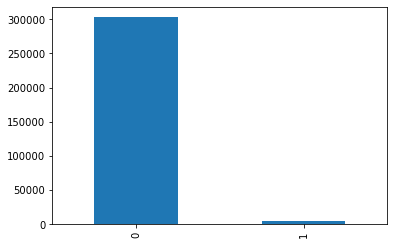

In [59]:
App_df.FLAG_DOCUMENT_5.value_counts().plot(kind = 'bar')
plt.show()

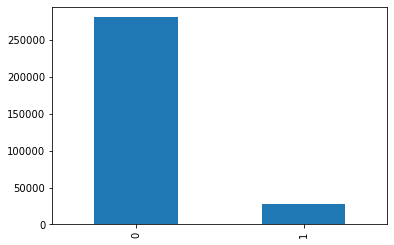

In [60]:
App_df.FLAG_DOCUMENT_6.value_counts().plot(kind = 'bar')
plt.show()

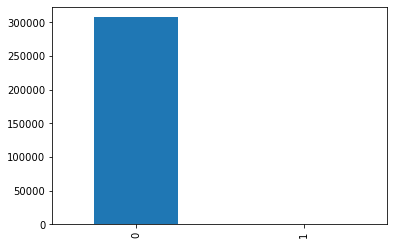

In [61]:
App_df.FLAG_DOCUMENT_7.value_counts().plot(kind = 'bar')
plt.show()

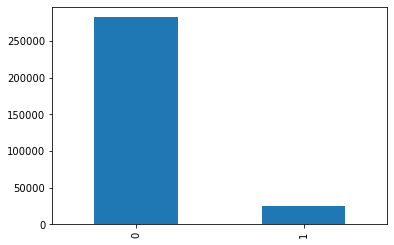

In [62]:
App_df.FLAG_DOCUMENT_8.value_counts().plot(kind = 'bar')
plt.show()

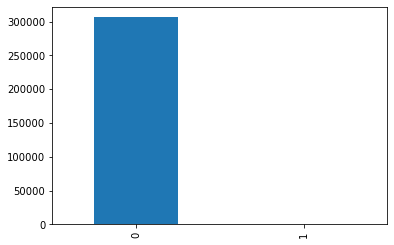

In [63]:
App_df.FLAG_DOCUMENT_9.value_counts().plot(kind = 'bar')
plt.show()

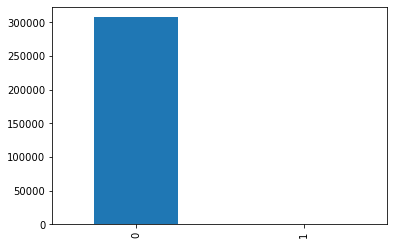

In [64]:
App_df.FLAG_DOCUMENT_10.value_counts().plot(kind = 'bar')
plt.show()

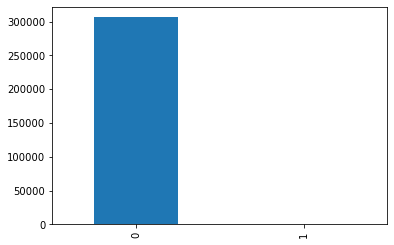

In [65]:
App_df.FLAG_DOCUMENT_11.value_counts().plot(kind = 'bar')
plt.show()

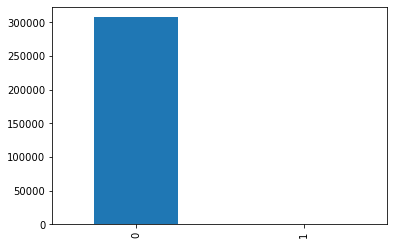

In [66]:
App_df.FLAG_DOCUMENT_12.value_counts().plot(kind = 'bar')
plt.show()

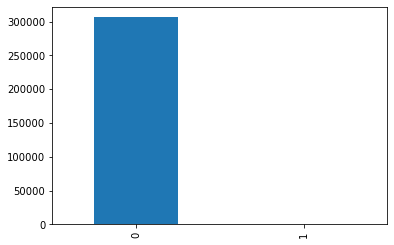

In [67]:
App_df.FLAG_DOCUMENT_13.value_counts().plot(kind = 'bar')
plt.show()

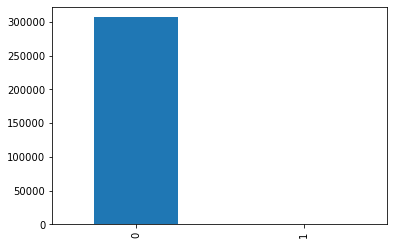

In [68]:
App_df.FLAG_DOCUMENT_14.value_counts().plot(kind = 'bar')
plt.show()

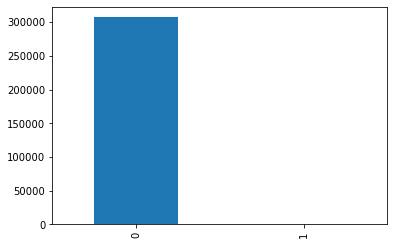

In [69]:
App_df.FLAG_DOCUMENT_15.value_counts().plot(kind = 'bar')
plt.show()

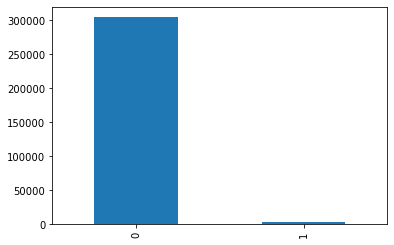

In [70]:
App_df.FLAG_DOCUMENT_16.value_counts().plot(kind = 'bar')
plt.show()

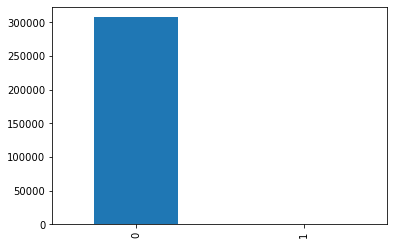

In [71]:
App_df.FLAG_DOCUMENT_17.value_counts().plot(kind = 'bar')
plt.show()

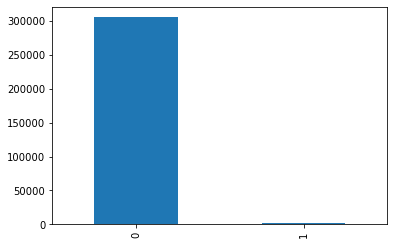

In [72]:
App_df.FLAG_DOCUMENT_18.value_counts().plot(kind = 'bar')
plt.show()

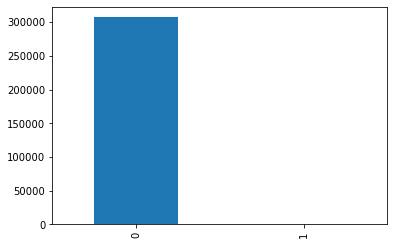

In [73]:
App_df.FLAG_DOCUMENT_19.value_counts().plot(kind = 'bar')
plt.show()

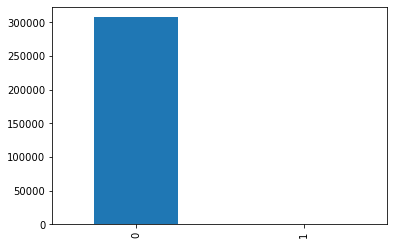

In [74]:
App_df.FLAG_DOCUMENT_20.value_counts().plot(kind = 'bar')
plt.show()

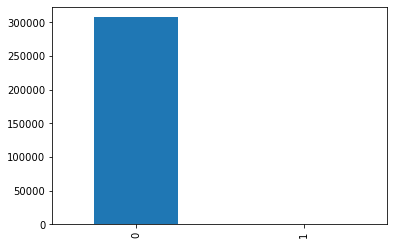

In [75]:
App_df.FLAG_DOCUMENT_21.value_counts().plot(kind = 'bar')
plt.show()

by plotting the graphs regarding the document submission only around 90000 clients have submitted document 3

**Till now i have done univariate analysis on some of the important variables and i have genearted some of the basic insights, now let me perform bivariate analysis**

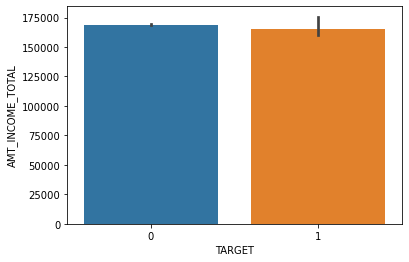

In [78]:
sns.barplot(x='TARGET', y = 'AMT_INCOME_TOTAL', data = App_df)
plt.show()

**As we can see in the above plots, people who had payment difficulties and people who are non defaulters received almost same income.**

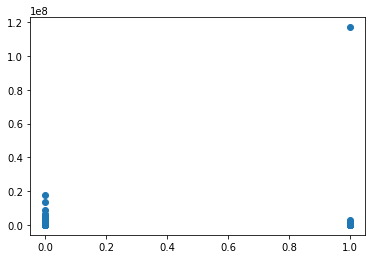

In [79]:
plt.scatter(App_df.TARGET, App_df.AMT_INCOME_TOTAL)
plt.show()

**By plotting the scatter plot between target variable against the income of the client we could observe that most of the people who has lesser income has the tendency to become a defaulter, and also there is an unsual outlier whose income is more than 12 crores and still has the difficulty in payment**

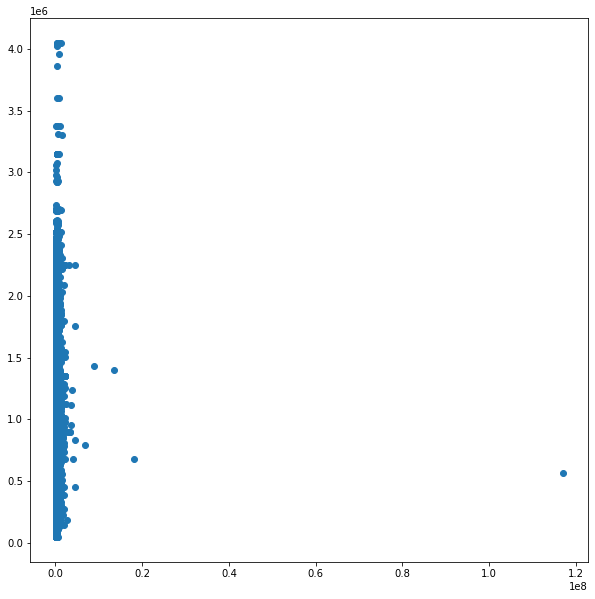

In [81]:
plt.figure(figsize=(10,10))
plt.scatter(App_df.AMT_INCOME_TOTAL, App_df.AMT_CREDIT)
plt.show()

By this scatter plot we can see that the clients who has 0 to 2crores of income has applied for loan.

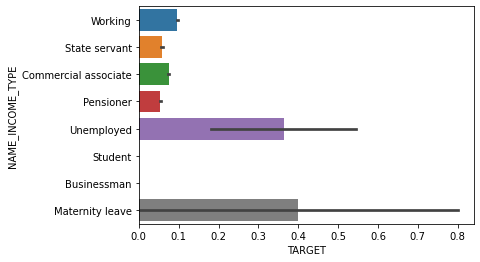

In [82]:
sns.barplot(x='TARGET', y = 'NAME_INCOME_TYPE', data = App_df)
plt.show()

**by the above bar plot of target vs income type, maternity leave and unemployed people tend to have more difficulty in payment**

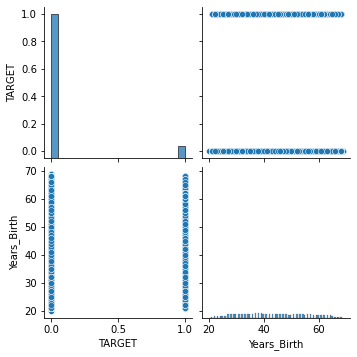

In [83]:
sns.pairplot(App_df[['TARGET','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','Years_Birth']])
plt.show()

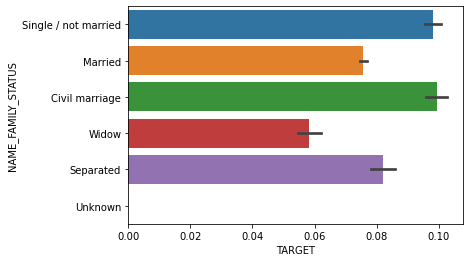

In [84]:
sns.barplot(x='TARGET', y = 'NAME_FAMILY_STATUS', data = App_df)
plt.show()

from the above plot we are able to see that family status of the client has not affected any payment difficulties.

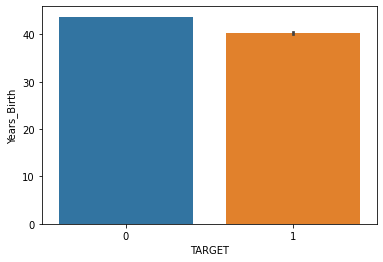

In [85]:
sns.barplot(x='TARGET', y = 'Years_Birth', data = App_df)
plt.show()

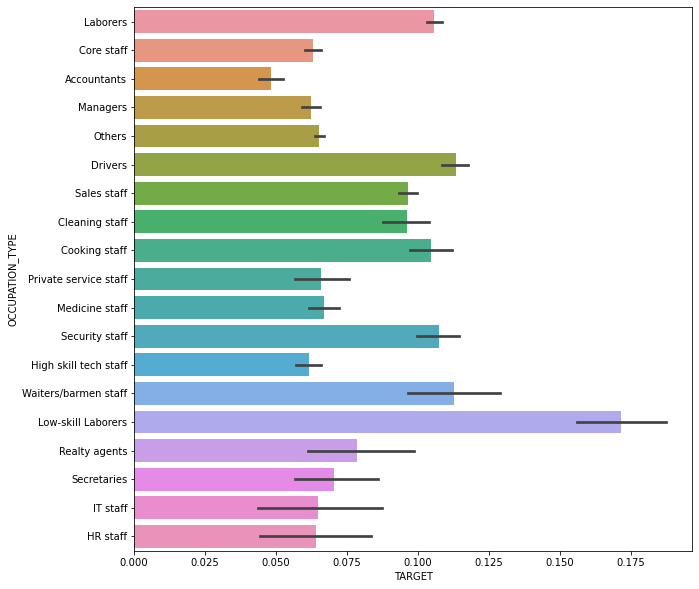

In [87]:
plt.figure(figsize=(10,10))
sns.barplot(x='TARGET', y = 'OCCUPATION_TYPE', data = App_df)
plt.show()

**When we see the plot of target variable against the occupation type we can see that low skill labourers might have higher payment difficulties whereas people who work as accountants might pay on time**

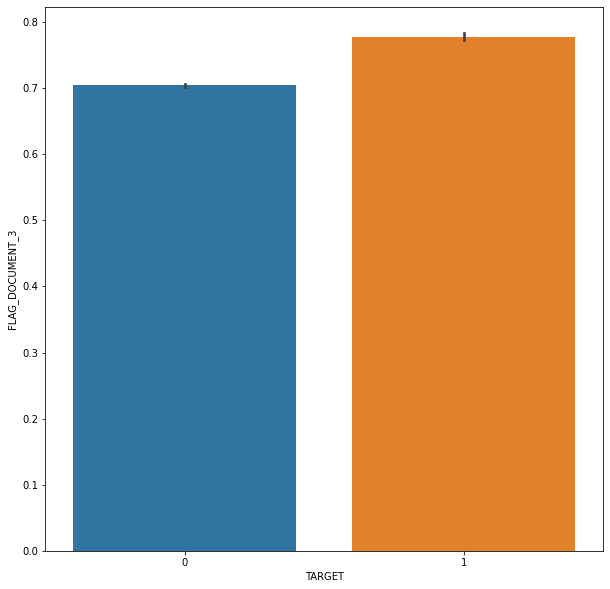

In [88]:
plt.figure(figsize=(10,10))
sns.barplot(x='TARGET', y = 'FLAG_DOCUMENT_3', data = App_df)
plt.show()

**After performing the Bivariate analysis on some of the coloumns and finding some insights from it now let us do operations on segemented data based on target variable and do analysis on that**

In [89]:
App_df.shape

(307511, 74)

In [91]:
df_defaulters = App_df[App_df['TARGET']==1]
df_defaulters.shape

(24825, 74)

In [94]:
df_Nondefaulters = App_df[App_df['TARGET']==0]
df_Nondefaulters.shape

(282686, 74)

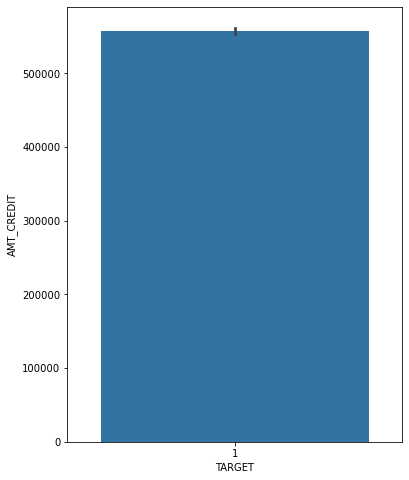

In [98]:
plt.figure(figsize=(6,8))
sns.barplot(x='TARGET', y = 'AMT_CREDIT', data =df_defaulters )
plt.show()

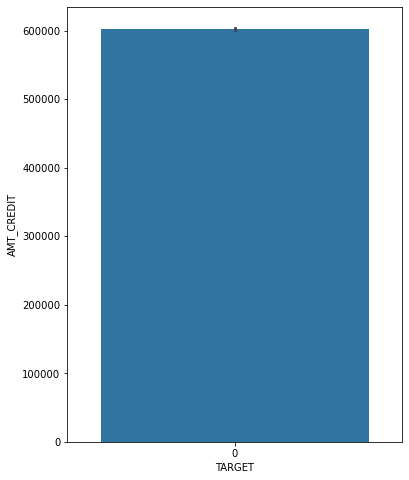

In [99]:
plt.figure(figsize=(6,8))
sns.barplot(x='TARGET', y = 'AMT_CREDIT', data =df_Nondefaulters )
plt.show()

By the above two comparisons the segmented analysis against the target variable of loan amount, the loan amount non defaulters are higher than the loan amount for defaulters

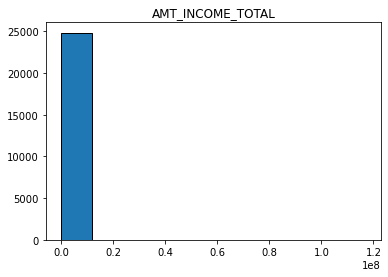

In [103]:
df_defaulters.hist(column='AMT_INCOME_TOTAL', grid = False, edgecolor='black')
plt.show()

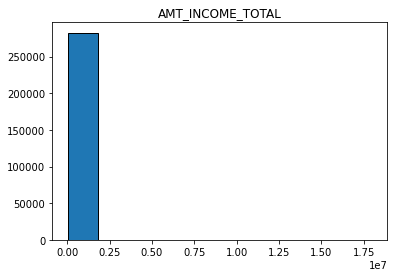

In [104]:
df_Nondefaulters.hist(column='AMT_INCOME_TOTAL', grid = False, edgecolor='black')
plt.show()

By comparing both the above plots income of the non defaulters are higher than the defaulters

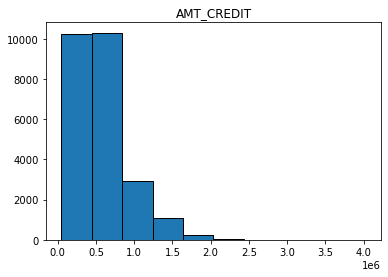

In [105]:
df_defaulters.hist(column='AMT_CREDIT', grid = False, edgecolor='black')
plt.show()

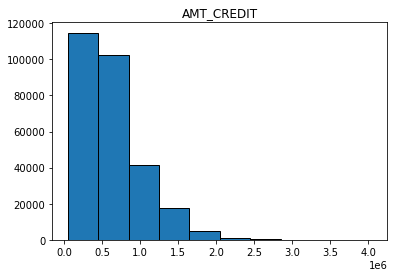

In [106]:
df_Nondefaulters.hist(column='AMT_CREDIT', grid = False, edgecolor='black')
plt.show()

The loan amount credited for the defaulters is than 25 lakhs where as the loan amount credited for non defaulters is less than 30 lakhs

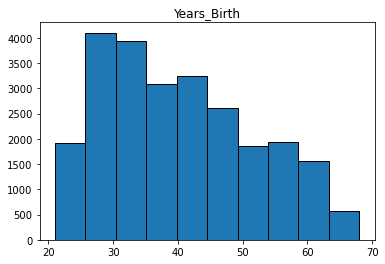

In [109]:
df_defaulters.hist(column='Years_Birth', grid = False, edgecolor='black')
plt.show()

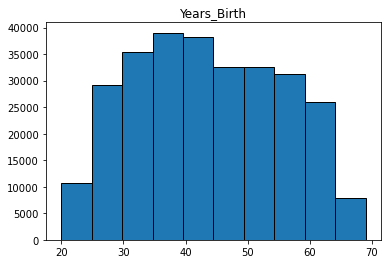

In [110]:
df_Nondefaulters.hist(column='Years_Birth', grid = False, edgecolor='black')
plt.show()

By comparing the above two plots number of deafulters are in between the age of 20 to 30 yrs old. Number of non defaulters are in the age of 35 to 45 yrs of age

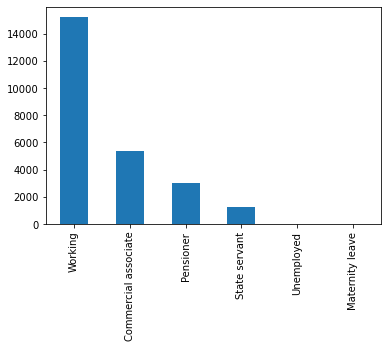

In [111]:
df_defaulters.NAME_INCOME_TYPE.value_counts().plot(kind = 'bar')
plt.show()

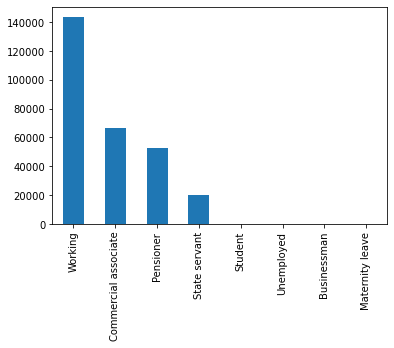

In [112]:
df_Nondefaulters.NAME_INCOME_TYPE.value_counts().plot(kind = 'bar')
plt.show()

By the above two plots deafulters and non defaulters are more in working profession.

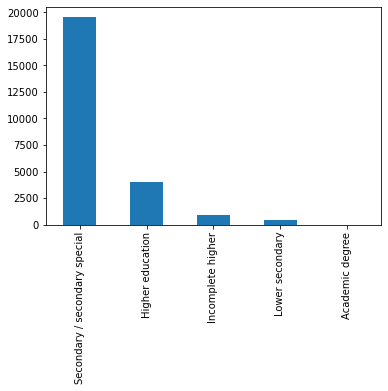

In [113]:
df_defaulters.NAME_EDUCATION_TYPE.value_counts().plot(kind = 'bar')
plt.show()

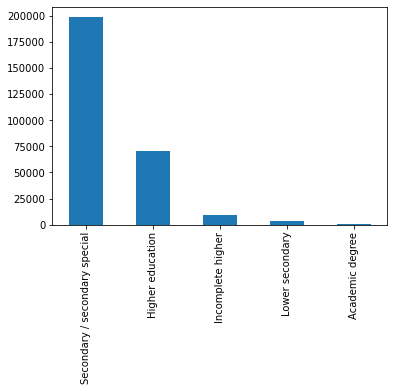

In [114]:
df_Nondefaulters.NAME_EDUCATION_TYPE.value_counts().plot(kind = 'bar')
plt.show()

It is found that the defaulters and non defaulters both are more from secondary/ secondary special education

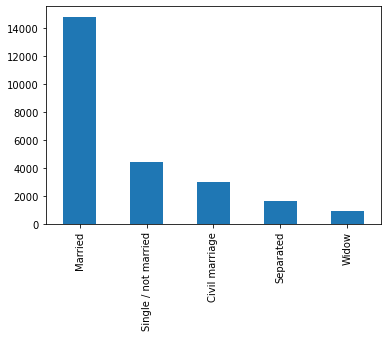

In [115]:
df_defaulters.NAME_FAMILY_STATUS.value_counts().plot(kind = 'bar')
plt.show()

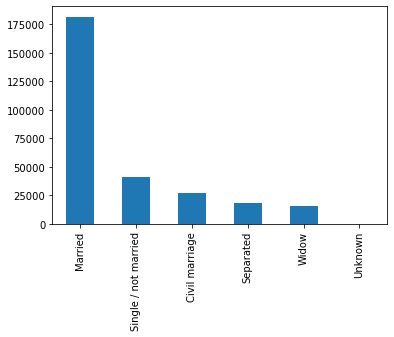

In [116]:
df_Nondefaulters.NAME_FAMILY_STATUS.value_counts().plot(kind = 'bar')
plt.show()

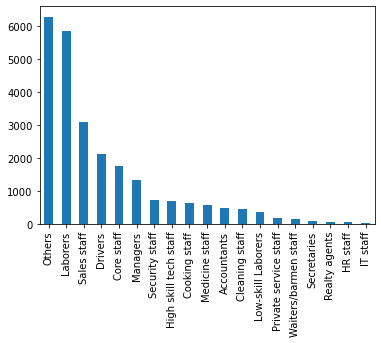

In [117]:
df_defaulters.OCCUPATION_TYPE.value_counts().plot(kind = 'bar')
plt.show()

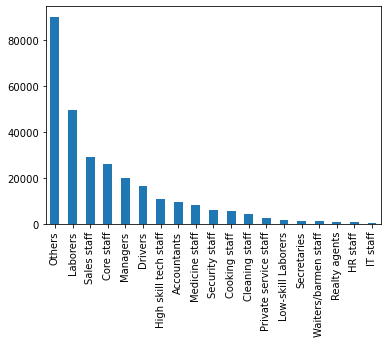

In [118]:
df_Nondefaulters.OCCUPATION_TYPE.value_counts().plot(kind = 'bar')
plt.show()

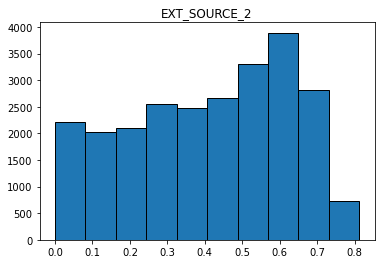

In [124]:
df_defaulters.hist(column='EXT_SOURCE_2', grid = False, edgecolor='black')
plt.show()

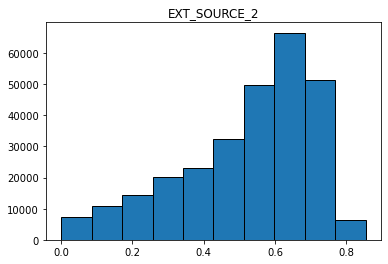

In [125]:
df_Nondefaulters.hist(column='EXT_SOURCE_2', grid = False, edgecolor='black')
plt.show()

Noramised rating for both deafulters and non defaulters are in between 0.6 to 0.7 

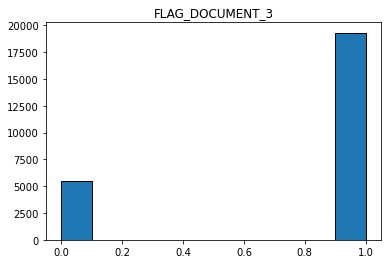

In [126]:
df_defaulters.hist(column='FLAG_DOCUMENT_3', grid = False, edgecolor='black')
plt.show()

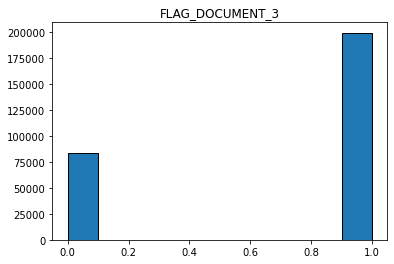

In [127]:
df_Nondefaulters.hist(column='FLAG_DOCUMENT_3', grid = False, edgecolor='black')
plt.show()

**Now we are done univariate, bivariate and segmented univariate analysis and we could draw some insights from it, now let us read previous application data and perform same operations to it.**

In [130]:
Preapp_data = pd.read_csv('previous_application.csv')
Preapp_data.shape

(1670214, 37)

In [131]:
Preapp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [133]:
Preapp_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

looking at the null value percentage i will choose more than 30 percent of the null values to be reatined.

In [134]:
perc1 = 30.0000
Thresh_value = int(((100-perc1)/100)*Preapp_data.shape[0]+1)
Preapp_data = Preapp_data.dropna(axis = 1, thresh = Thresh_value)
Preapp_data.shape

(1670214, 26)

In [135]:
Preapp_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  ...  NAME_CLIENT_TYPE  \
0                       15                           Y  ...          Repeater   
1                       11                           Y  ...          Repeater   
2                       11                           Y  ...          Repeater   
3                        7                           Y  ...          Repeater   
4                        9                           Y  ...          Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO  NAME_PRODUCT_TYPE  \
0              Mobile            POS                XNA   
1                 XNA           Cash             x-sell   
2                 XNA           Cash             x-sell   
3                 XNA           Cash             x-sell   
4                 XNA           Cash            walk-in   

              CHANNEL_TYPE SELLERPLACE_AREA NAME_SELLER_INDUSTRY CNT_PAYMENT  \
0             Country-wide               35         Connectivity        12.0   
1           Contact center               -1                  XNA        36.0   
2  Credit and cash offices               -1                  XNA        12.0   
3  Credit and cash offices               -1                  XNA        12.0   
4  Credit and cash offices               -1                  XNA        24.0   

  NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0           middle  POS mobile with interest  
1       low_action          Cash X-Sell: low  
2             high         Cash X-Sell: high  
3           middle       Cash X-Sell: middle  
4             high         Cash Street: high  

[5 rows x 26 columns]

In [136]:
Preapp_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [139]:
Preapp_data.AMT_ANNUITY.fillna(value = np.NaN, inplace=True)


In [140]:
Preapp_data.AMT_GOODS_PRICE.fillna(value = np.NaN, inplace=True)

In [141]:
Preapp_data.CNT_PAYMENT.fillna(value = np.NaN, inplace=True)

In [142]:
Preapp_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  ...  NAME_CLIENT_TYPE  \
0                       15                           Y  ...          Repeater   
1                       11                           Y  ...          Repeater   
2                       11                           Y  ...          Repeater   
3                        7                           Y  ...          Repeater   
4                        9                           Y  ...          Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO  NAME_PRODUCT_TYPE  \
0              Mobile            POS                XNA   
1                 XNA           Cash             x-sell   
2                 XNA           Cash             x-sell   
3                 XNA           Cash             x-sell   
4                 XNA           Cash            walk-in   

              CHANNEL_TYPE SELLERPLACE_AREA NAME_SELLER_INDUSTRY CNT_PAYMENT  \
0             Country-wide               35         Connectivity        12.0   
1           Contact center               -1                  XNA        36.0   
2  Credit and cash offices               -1                  XNA        12.0   
3  Credit and cash offices               -1                  XNA        12.0   
4  Credit and cash offices               -1                  XNA        24.0   

  NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0           middle  POS mobile with interest  
1       low_action          Cash X-Sell: low  
2             high         Cash X-Sell: high  
3           middle       Cash X-Sell: middle  
4             high         Cash Street: high  

[5 rows x 26 columns]

lets perform bivariate analysis on some of the important variablesn against the target variable 'NAME_CONTRACT_STATUS'


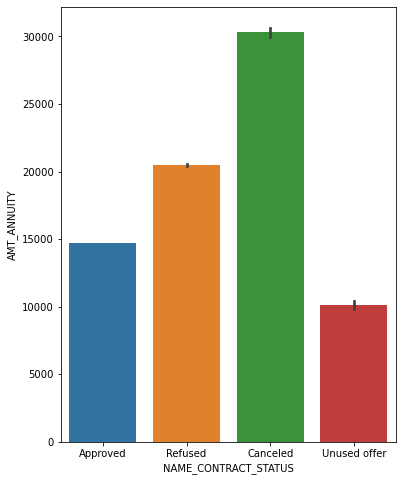

In [143]:
plt.figure(figsize=(6,8))
sns.barplot(x='NAME_CONTRACT_STATUS', y = 'AMT_ANNUITY', data = Preapp_data )
plt.show()

The above shows that people who has approved loan has the ammount annuity nearly 15 thousand.

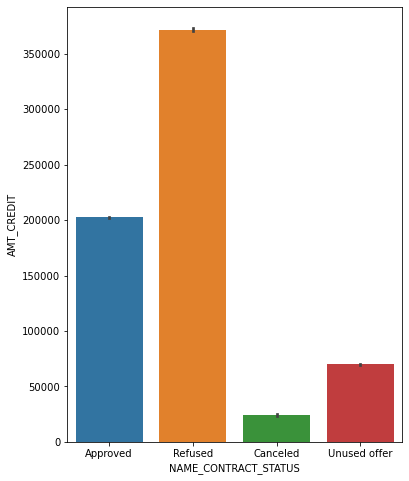

In [144]:
plt.figure(figsize=(6,8))
sns.barplot(x='NAME_CONTRACT_STATUS', y = 'AMT_CREDIT', data = Preapp_data )
plt.show()

by the baove plot we could see that the person whose loan application is approved has the amount credited upto 2 lakhs.

Now let me merge the application data as well as previous application data 

In [151]:
prev_apl_data = App_df.merge(Preapp_data, on = 'SK_ID_CURR', how = 'inner')
prev_apl_data.shape

(1413701, 99)

In [152]:
prev_apl_data.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE_x             0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT_x                     0.000000
AMT_ANNUITY_x                    0.006578
AMT_GOODS_PRICE_x                0.085449
NAME_TYPE_SUITE                  0.249416
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

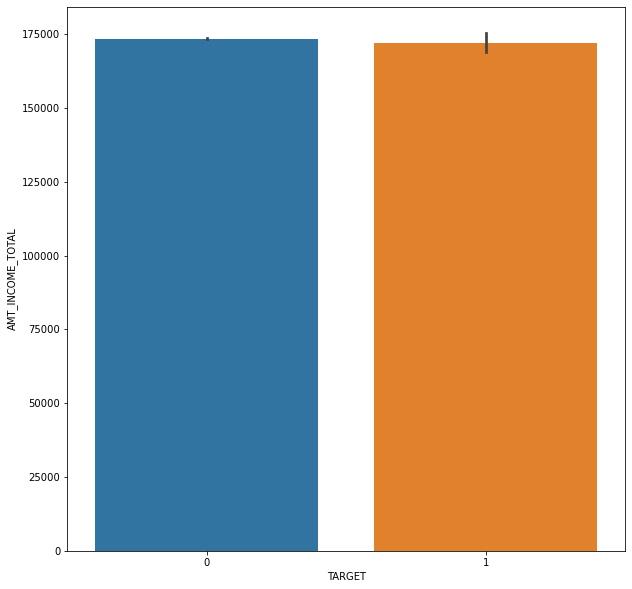

In [153]:
plt.figure(figsize=(10,10))
sns.barplot(x='TARGET', y = 'AMT_INCOME_TOTAL', data = prev_apl_data)
plt.show()

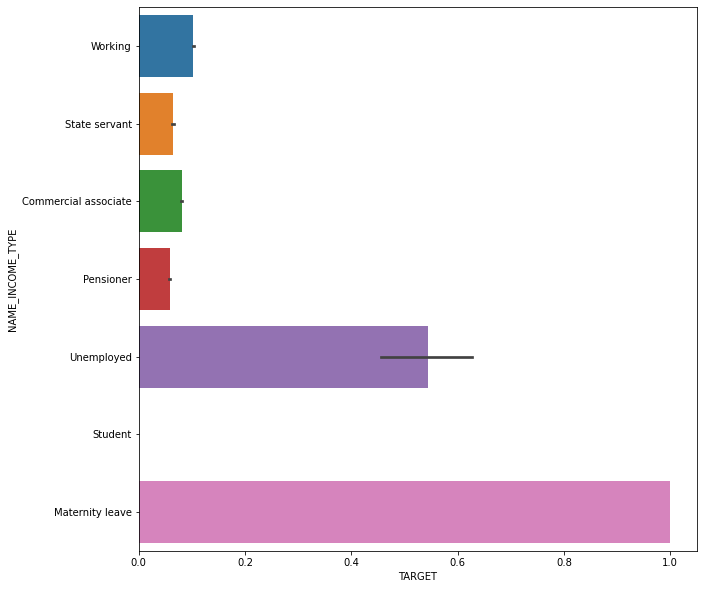

In [154]:
plt.figure(figsize=(10,10))
sns.barplot(x='TARGET', y = 'NAME_INCOME_TYPE', data = prev_apl_data)
plt.show()

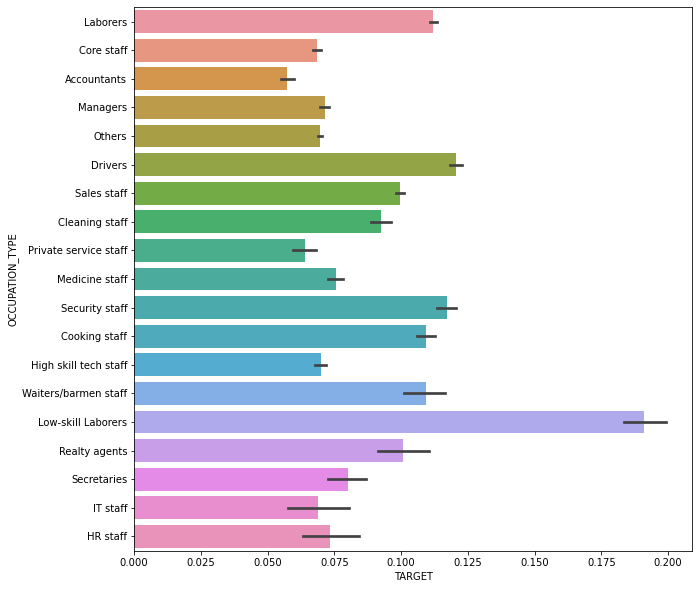

In [155]:
plt.figure(figsize=(10,10))
sns.barplot(x='TARGET', y = 'OCCUPATION_TYPE', data = prev_apl_data)
plt.show()

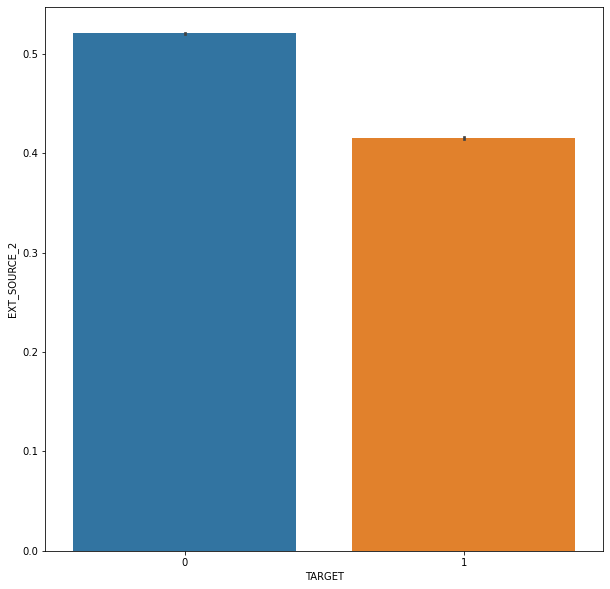

In [156]:
plt.figure(figsize=(10,10))
sns.barplot(x='TARGET', y = 'EXT_SOURCE_2', data = prev_apl_data)
plt.show()

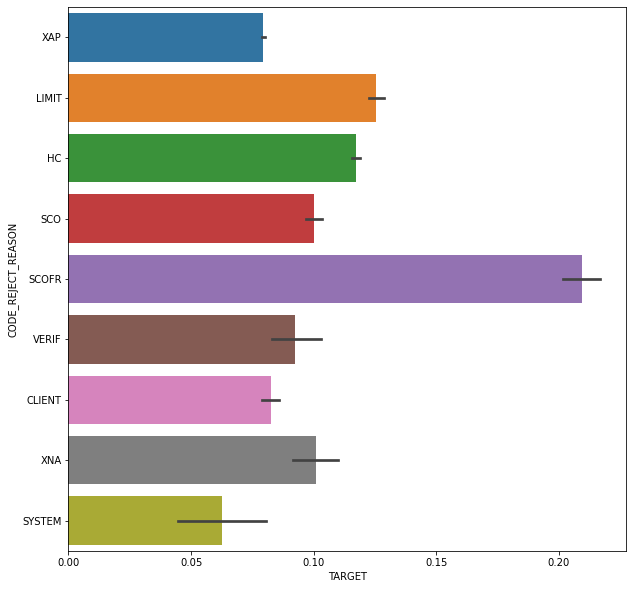

In [157]:
plt.figure(figsize=(10,10))
sns.barplot(x='TARGET', y = 'CODE_REJECT_REASON', data = prev_apl_data)
plt.show()